In [1]:
from sympy import *
import numpy as np
x = Symbol('x')
y = Symbol('y')
f = 100*(y-x**2)**2+(1-x)**2
f.subs([(x, 10), (y, 5)])

902581

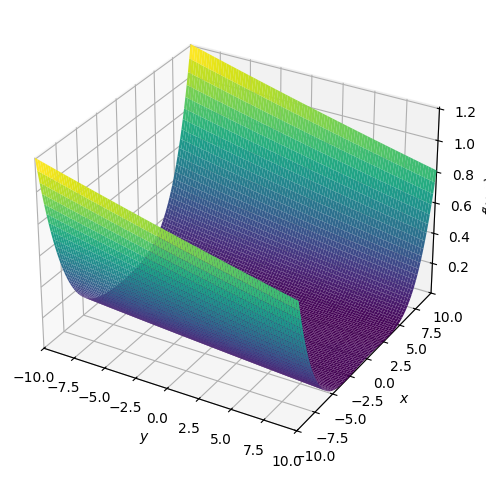

In [2]:
from sympy.plotting import plot3d

plt = plot3d(f)

In [3]:
def dx(f, x_val, y_val):
    return diff(f, x).subs([[x, x_val], [y, y_val]])
    
def dy(f, x_val, y_val):
    return diff(f, y).subs([[x, x_val], [y, y_val]])


In [4]:
def directional_deriv(f, x_val, y_val, p):
    grad = np.array([dx(f, x_val, y_val), dy(f, x_val, y_val)], dtype=float)
    norm_p = np.sqrt(p[0]**2 + p[1]**2)
    u = np.array(p) / norm_p
    return np.dot(grad, u)

p = (1, 1)
directional_deriv(f, 2, 1, p)

1274.2064196981585

In [5]:
def approx_directional_deriv(f, x_val, y_val, p, epsilon):
    norm_p = np.sqrt(p[0]**2 + p[1]**2)
    u = np.array(p) / norm_p
    new_x = x_val + epsilon * u[0]
    new_y = y_val + epsilon * u[1]
    f_original = f.subs([(x, x_val), (y, y_val)])
    f_shifted = f.subs([(x, new_x), (y, new_y)])
    return (f_shifted - f_original) / epsilon

p = (1, 1)
approx_directional_deriv(f, 2, 1, p, 1e-5)

1274.21392469387